## TP3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en `Material_TPs/TP3/images` a partir del template `Material_TPs/TP3/template`
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

**Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección**


### Resolución

- Para cada imagen de la carpeta `images` intenta determinar automáticamente la mejor escala de imagen y el método más acertado para detectar el logo de Coca Cola.
- Los resultados se guardan en la carpeta `matched`.


In [1]:
import cv2 as cv
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 8)

# match_template es un archivo python que contiene las distintas funciones implementadas
import match_template as mt
from match_template import matchTemplate

# imagenes_util es un archivo python con funciones para visualizar las imágenes.
# El objetivo de este archivo fue tener una Notebook lo más despejada de código que dificulte la lectura. 
import imagenes_util as img_util

import glob

procesando COCA-COLA-LOGO.jpg ...
ic= 0.1388


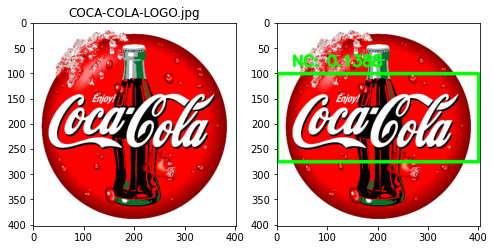

procesando coca_logo_1.png ...
ic= 0.1594


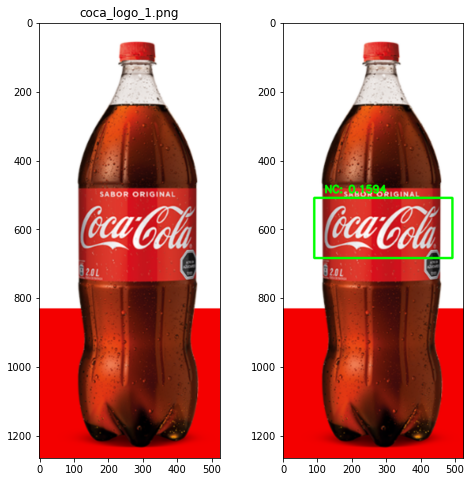

procesando coca_logo_2.png ...
ic= 0.1608


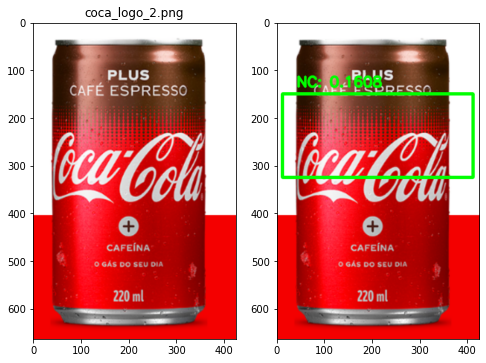

procesando coca_multi.png ...
ic= 0.161


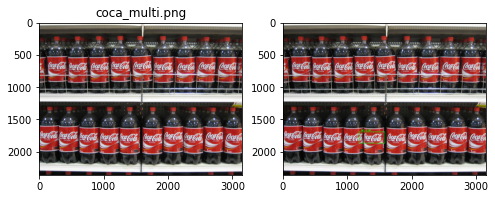

procesando coca_retro_1.png ...
ic= 0.1596


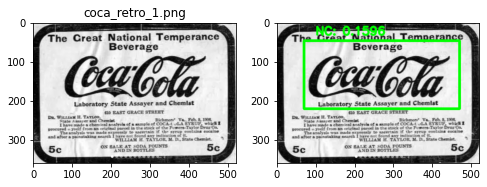

procesando coca_retro_2.png ...
ic= 0.1583


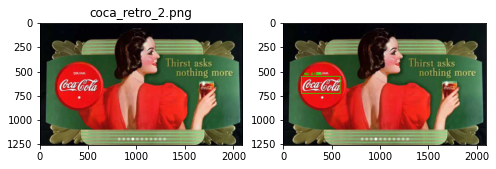

procesando logo_1.png ...
ic= 0.1589


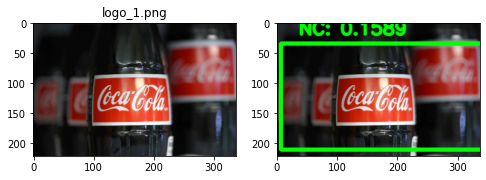

In [2]:
image_names = glob.glob('images/*')
image_names.sort()

output = dict()
for image_name_full in image_names:
    img_name = image_name_full[7:]
    img = cv.imread(image_name_full,cv.IMREAD_COLOR)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    print(f'procesando {img_name} ...')

    # Funcion principal (implementada en match_template.py)
    imagen, imagen_detected, ic = matchTemplate(img_rgb)

    # no encontró un match
    if ic == -1:
        continue
        
    print(f'ic= {ic:.4}')
    plt.subplot(121); plt.imshow(imagen); plt.title(img_name)
    plt.subplot(122); plt.imshow(imagen_detected); plt.show()

    # Guardo el resultado
    img_util.save_image('matched/' + img_name, imagen_detected, img_rgb.shape)


### Resultados

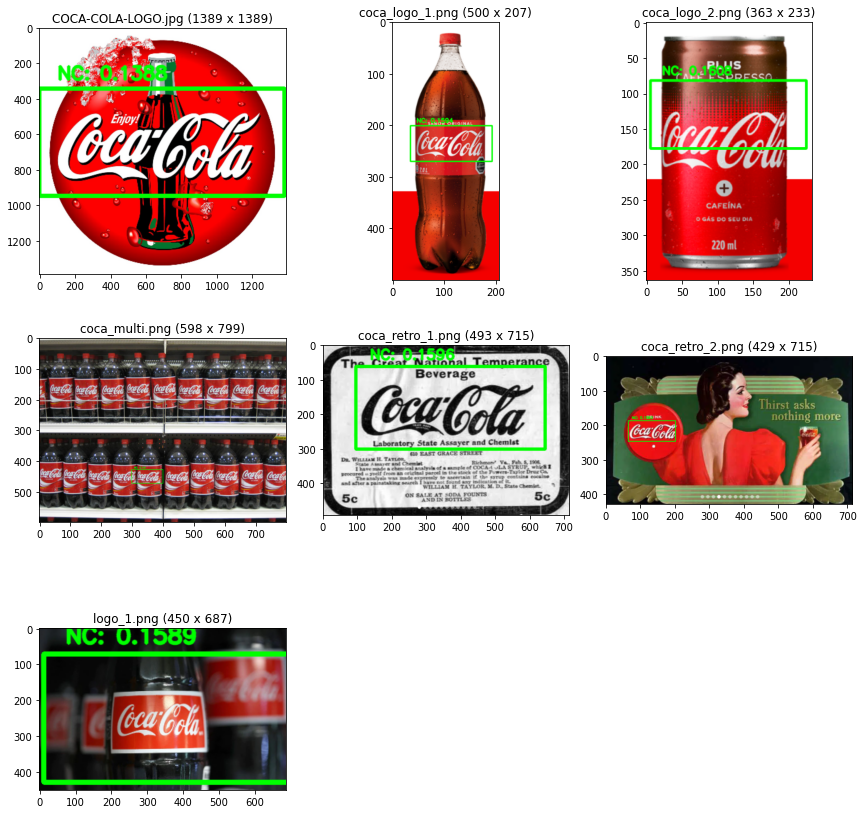

In [3]:
# Imágenes
image_names = glob.glob('matched/*')
image_names.sort()
    
output = dict()

for image_name in image_names:
    img_name_short = image_name[8:]
    img = cv.imread(image_name,cv.IMREAD_COLOR)
    # Para plotear pasamos la imagen a RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    output[img_name_short] = img

img_util.plot_set_imagenes(output, '', columnas = 3)